In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [33]:
df=pd.read_csv(r"C:\Users\himanshu pandey\Videos\MACHINE LEARNING\data.csv")

In [34]:
df.head()

URLs  \
0  http://www.bbc.com/news/world-us-canada-414191...   
1  https://www.reuters.com/article/us-filmfestiva...   
2  https://www.nytimes.com/2017/10/09/us/politics...   
3  https://www.reuters.com/article/us-mexico-oil-...   
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...   

                                            Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  Label  
0  Image copyright Getty Images\nOn Sunday mornin...      1  
1  LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2  The feud broke into public view last week when...      1  
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4  Country singer Jason Aldean, who was performin...      1

In [95]:
df.shape

(3988, 3)

In [35]:
df.describe()

Label
count  4009.000000
mean      0.466949
std       0.498969
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

In [36]:
df.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [37]:
df['Label'].unique()

array([1, 0], dtype=int64)

In [38]:
cols=['URLs']
df=df.drop(cols,axis=1)

In [70]:
df.head()

Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  Label  
0  Image copyright Getty Images\nOn Sunday mornin...      1  
1  LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2  The feud broke into public view last week when...      1  
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4  Country singer Jason Aldean, who was performin...      1

###### Data Exploration:

In [40]:
df=df.dropna(axis=0)

In [41]:
df.isnull().sum()

Headline    0
Body        0
Label       0
dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

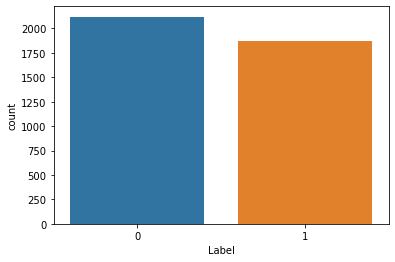

In [43]:
sns.countplot(df['Label'])

Both labels seem equally likely.


###### Plotting the wordclouds for both the labels:

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
from wordcloud import WordCloud

In [46]:
from nltk.corpus import stopwords

In [47]:
def clean_it(X):
    X_clean = [char for char in X if char not in string.punctuation]
    X_join = ''.join(X_clean)
    X_final_clean = [word for word in X_join.split() if word not in stopwords.words('english')]
    return(X_final_clean)

In [49]:
label=df['Label']
News=df['Body']
Headline=df['Headline']

###### Wordclouds of 0 label

In [71]:
label_0 = df[df['Label']==0]
label_0.head()

Headline  \
5                    JetNation FanDuel League; Week 4   
10  U.S. President Donald Trump Quietly Signs Law ...   
11  2017 Fantasy Football Team Defense Rankings - ...   
12           Just Shut Up & Play Some Damn Baseball!!   
14  10/7: Chuck Axed; HBD Brickyard, Adam, Moonlig...   

                                                 Body  Label  
5   JetNation FanDuel League; Week 4\n% of readers...      0  
10  By Aaron Kesel\nAs former White House chief of...      0  
11  2017 Fantasy Football Team Defense Rankings – ...      0  
12  Just Shut Up & Play Some Damn Baseball!!\n(Bef...      0  
14  A Potato Battery Can Light up a Room for Over ...      0

###### Headline wordcloud for label 0

In [61]:
label_0_HL = label_0['Headline'].tolist()
label_0_HL

['JetNation FanDuel League; Week 4',
 'U.S. President Donald Trump Quietly Signs Law To Allow Warrantless Searches In Parts Of VA, DC and MD',
 '2017 Fantasy Football Team Defense Rankings - Week 5',
 'Just Shut Up & Play Some Damn Baseball!!',
 '10/7: Chuck Axed; HBD Brickyard, Adam, Moonlight Ace & Chuck; AS; Season Finales...',
 'Trump Bemoans ‘Little Appreciation’ As San Juan Mayor Begs For Water',
 "In Meeting With Military, Trump Talks Of 'Calm Before The Storm'",
 'Teacher Sparks Outrage By Asking Kids To Make Nazi Mascots',
 '9/28 Through the 40s: The Gloaming; HBD Bill, Lou, Cy the Third, Everett, Cy, Leon & Buck; Clarke Honored;Tiny 2-Hitter',
 'Hillary Clinton Suggests That Trump May Order the Murder of Journalists',
 '9/29 Through the 40s: HBD Cannonball & Paul, Camnitz Clan, Game Stories',
 '10/3 Expo Park-Forbes Field Era: Pirates, Grays WS Win, Game Stories',
 'Blackhawks Roster Breakdown: Goalies',
 'CycleBar Westgate West Hosts Benefit Cycle Ride to Help ‘Fragile Bone 

In [63]:
label_0_Headline= ''.join(label_0_HL)
label_0_Headline

'JetNation FanDuel League; Week 4U.S. President Donald Trump Quietly Signs Law To Allow Warrantless Searches In Parts Of VA, DC and MD2017 Fantasy Football Team Defense Rankings - Week 5Just Shut Up & Play Some Damn Baseball!!10/7: Chuck Axed; HBD Brickyard, Adam, Moonlight Ace & Chuck; AS; Season Finales...Trump Bemoans ‘Little Appreciation’ As San Juan Mayor Begs For WaterIn Meeting With Military, Trump Talks Of \'Calm Before The Storm\'Teacher Sparks Outrage By Asking Kids To Make Nazi Mascots9/28 Through the 40s: The Gloaming; HBD Bill, Lou, Cy the Third, Everett, Cy, Leon & Buck; Clarke Honored;Tiny 2-HitterHillary Clinton Suggests That Trump May Order the Murder of Journalists9/29 Through the 40s: HBD Cannonball & Paul, Camnitz Clan, Game Stories10/3 Expo Park-Forbes Field Era: Pirates, Grays WS Win, Game StoriesBlackhawks Roster Breakdown: GoaliesCycleBar Westgate West Hosts Benefit Cycle Ride to Help ‘Fragile Bone Disease’ Foundation on Oct. 7PA Attorney General Concerned About

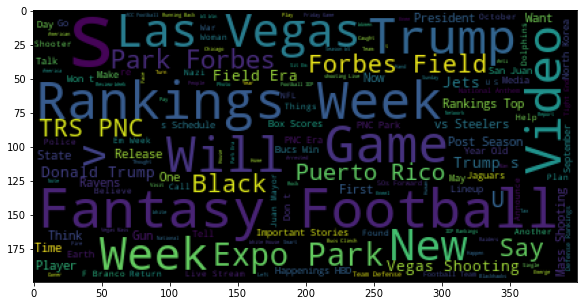

In [64]:
plt.figure(figsize=(10,5))
plt.imshow(WordCloud().generate(label_0_Headline))

Most appeared words in Headlines of label 0 looks to be Fantasy,Football,Game,Rankings, Trump

###### Wordcloud for label 0 'News body'

In [65]:
label_0_body = label_0['Body'].tolist()
label_0_body

["JetNation FanDuel League; Week 4\n% of readers think this story is Fact. Add your two cents.\n(Before It's News)\nOur FanDuel league is back again this week. Here are the details:\n$900 in total prize money. $250 to the winner. $10 to enter.\nRemember this is a one week league, pick your lineup against the salary cap and next week if you want to play again you can pick a completely different lineup if you want.\nClick this link to enter — http://fanduel.com/JetNation\nYou can discuss this with other NY Jets fans on the Jet Nation message board. Or visit of on Facebook.\nSource: http://www.jetnation.com/2017/09/27/jetnation-fanduel-league-week-4/",
 'By Aaron Kesel\nAs former White House chief of staff and current Chicago Mayor Rahm Emanuel has said: “You never let a serious crisis go to waste.” While everyone was worried about the hurricanes, U.S. President Donald Trump signed away the Fourth Amendment buried in a new bill. He set a precedent by empowering the police state to allow w

In [66]:
label_0_news= ''.join(label_0_body)
label_0_news

'JetNation FanDuel League; Week 4\n% of readers think this story is Fact. Add your two cents.\n(Before It\'s News)\nOur FanDuel league is back again this week. Here are the details:\n$900 in total prize money. $250 to the winner. $10 to enter.\nRemember this is a one week league, pick your lineup against the salary cap and next week if you want to play again you can pick a completely different lineup if you want.\nClick this link to enter — http://fanduel.com/JetNation\nYou can discuss this with other NY Jets fans on the Jet Nation message board. Or visit of on Facebook.\nSource: http://www.jetnation.com/2017/09/27/jetnation-fanduel-league-week-4/By Aaron Kesel\nAs former White House chief of staff and current Chicago Mayor Rahm Emanuel has said: “You never let a serious crisis go to waste.” While everyone was worried about the hurricanes, U.S. President Donald Trump signed away the Fourth Amendment buried in a new bill. He set a precedent by empowering the police state to allow warran

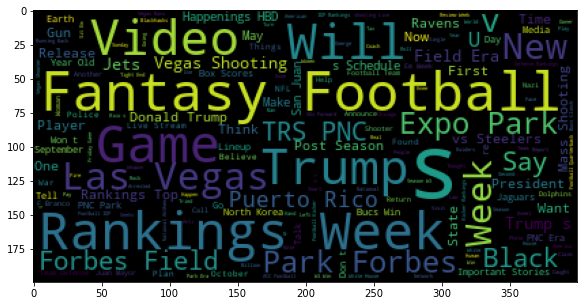

In [67]:
plt.figure(figsize=(10,5))
plt.imshow(WordCloud().generate(label_0_Headline))

The body also suggests the most appeared words to be football,fantasy,rankings,trump, week

###### Label 1 wordclouds for Headlines and News Body 

In [69]:
label_1= df[df['Label']==1]
label_1.head()

Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  Label  
0  Image copyright Getty Images\nOn Sunday mornin...      1  
1  LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2  The feud broke into public view last week when...      1  
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4  Country singer Jason Aldean, who was performin...      1

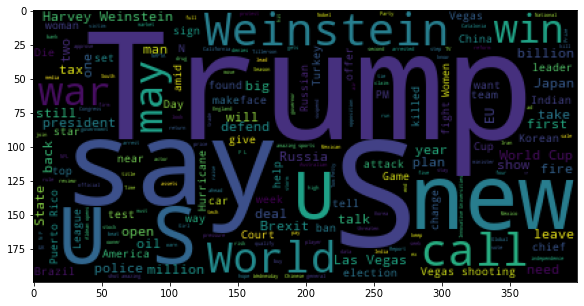

In [72]:
label_1_HL = label_1['Headline'].tolist()
label_1_Headline= ''.join(label_1_HL)
plt.figure(figsize=(10,5))
plt.imshow(WordCloud().generate(label_1_Headline))

Most appeared words in the headline of label one are Trump,US,new,World,Weinstein

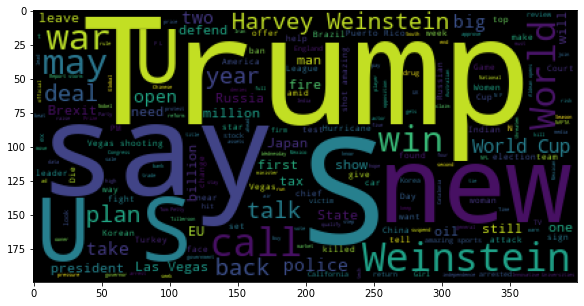

In [73]:
label_1_body = label_1['Body'].tolist()
label_1_news= ''.join(label_1_HL)
plt.figure(figsize=(10,5))
plt.imshow(WordCloud().generate(label_1_news))

For newsbody of label 1 , Trump, say ,US,new , Harvey,War seems the most appeared words.

In [22]:
# f=['Headlines','Body'] , Feature columns
Target=df['Label']#Target
col=['Label']
Features = df.drop(col,axis=1)

In [24]:
Target.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [25]:
Features.head()

Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  
0  Image copyright Getty Images\nOn Sunday mornin...  
1  LONDON (Reuters) - “Last Flag Flying”, a comed...  
2  The feud broke into public view last week when...  
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...  
4  Country singer Jason Aldean, who was performin...

In [26]:
Features = Features.dropna(axis=0)

In [28]:
Features.isnull().sum()

Headline    0
Body        0
dtype: int64

In [89]:
Headline_clean =Features['Headline'].apply(clean_it)

In [90]:
Headline_clean

0       [Four, ways, Bob, Corker, skewered, Donald, Tr...
1       [Linklaters, war, veteran, comedy, speaks, mod...
2       [Trump’s, Fight, With, Corker, Jeopardizes, Hi...
3       [Egypts, Cheiron, wins, tieup, Pemex, Mexican,...
4             [Jason, Aldean, opens, SNL, Vegas, tribute]
                              ...                        
4003    [CNN, Globalist, Exposed, Steve, Quayle, Alex,...
4004                                      [Trends, Watch]
4005    [Trump, Jr, Is, Soon, To, Give, A, 30Minute, S...
4007    [China, accept, overseas, trial, data, bid, sp...
4008    [Vice, President, Mike, Pence, Leaves, NFL, Ga...
Name: Headline, Length: 3988, dtype: object

In [91]:
News_clean = Features['Body'].apply(clean_it)
News_clean

0       [Image, copyright, Getty, Images, On, Sunday, ...
1       [LONDON, Reuters, “Last, Flag, Flying”, comedy...
2       [The, feud, broke, public, view, last, week, M...
3       [MEXICO, CITY, Reuters, Egypt’s, Cheiron, Hold...
4       [Country, singer, Jason, Aldean, performing, L...
                              ...                        
4003    [Vietnam, Is, Great, Danger, You, Must, Publis...
4004    [Trends, Watch, readers, think, story, Fact, A...
4005    [Trump, Jr, Is, Soon, To, Give, A, 30Minute, S...
4007    [SHANGHAI, Reuters, China, said, plans, accept...
4008    [Vice, President, Mike, Pence, Leaves, NFL, Ga...
Name: Body, Length: 3988, dtype: object

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=clean_it,dtype=np.uint8)
news_countvectorizer=vectorizer.fit_transform(Features['Body'])

In [102]:
vectorizer.get_params()

{'analyzer': <function __main__.clean_it(X)>,
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.uint8,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [103]:
print(vectorizer.get_feature_names())

['0', '00', '000', '0000', '0001', '00033528', '0003355', '00043456', '0004347', '0030', '004', '0040', '0046', '0048', '0051', '0054', '0058', '005930KS', '007864', '01', '010', '0102', '0104', '0107', '010817', '0109', '0111', '0113', '0114', '0115', '0117', '0118', '0119', '0120', '0121', '0123', '0124', '0126', '0127', '0130', '0132', '0134', '0137', '0138', '014', '0143', '0145', '0146', '0148', '015', '0151', '0157', '02', '020', '0200', '0201', '0202', '0204', '0211', '0213', '0216', '0218', '022', '0220', '0221', '0228', '0230', '0235', '0237', '0239', '0240', '0242', '0243', '0250', '0252', '0253', '0257', '0258', '02secs', '03', '0305', '0306', '0309', '031', '0311', '031238', '0313', '0333', '0348', '0356', '0358', '03secs', '04', '0400', '041', '0410', '0415', '042', '0424', '043', '0436', '0440', '0445', '045', '046', '048', '048616', '05', '0515036', '0515040', '0558', '057', '05secs', '06', '0600', '0607secs', '0631', '067', '0697', '07', '0700HK', '0720', '073', '075', 

In [105]:
a=news_countvectorizer.toarray()
print(a)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [108]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer2=CountVectorizer(analyzer=clean_it,dtype=np.uint8)
Headline_countvectorizer=vectorizer2.fit_transform(Features['Headline'])

In [107]:
vectorizer2.get_params()

{'analyzer': <function __main__.clean_it(X)>,
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.uint8,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [110]:
vectorizer.get_feature_names()

['0',
 '00',
 '000',
 '0000',
 '0001',
 '00033528',
 '0003355',
 '00043456',
 '0004347',
 '0030',
 '004',
 '0040',
 '0046',
 '0048',
 '0051',
 '0054',
 '0058',
 '005930KS',
 '007864',
 '01',
 '010',
 '0102',
 '0104',
 '0107',
 '010817',
 '0109',
 '0111',
 '0113',
 '0114',
 '0115',
 '0117',
 '0118',
 '0119',
 '0120',
 '0121',
 '0123',
 '0124',
 '0126',
 '0127',
 '0130',
 '0132',
 '0134',
 '0137',
 '0138',
 '014',
 '0143',
 '0145',
 '0146',
 '0148',
 '015',
 '0151',
 '0157',
 '02',
 '020',
 '0200',
 '0201',
 '0202',
 '0204',
 '0211',
 '0213',
 '0216',
 '0218',
 '022',
 '0220',
 '0221',
 '0228',
 '0230',
 '0235',
 '0237',
 '0239',
 '0240',
 '0242',
 '0243',
 '0250',
 '0252',
 '0253',
 '0257',
 '0258',
 '02secs',
 '03',
 '0305',
 '0306',
 '0309',
 '031',
 '0311',
 '031238',
 '0313',
 '0333',
 '0348',
 '0356',
 '0358',
 '03secs',
 '04',
 '0400',
 '041',
 '0410',
 '0415',
 '042',
 '0424',
 '043',
 '0436',
 '0440',
 '0445',
 '045',
 '046',
 '048',
 '048616',
 '05',
 '0515036',
 '0515040',
 '0

In [111]:
b=Headline_countvectorizer.toarray()
b

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [112]:
a.shape

(3988, 72951)

In [113]:
b.shape

(3988, 9289)

###### Making a dataframe of newsbody

In [120]:
body_df=pd.DataFrame(a)

In [121]:
headlines_df=pd.DataFrame(b)

In [122]:
headlines_df

0     1     2     3     4     5     6     7     8     9     ...  9279  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
3983     0     0     0     0     0     0     0     0     0     0  ...     0   
3984     0     0     0     0     0     0     0     0     0     0  ...     0   
3985     0     0     0     0     0     0     0     0     0     0  ...     0   
3986     0     0     0     0     0     0     0     0     0     0  ...     0   
3987     0     0     0     0     0     0     0     0     0     0  ...     0   

      9280  9281  9282  9283  9284  9285  9286  9287  9288  
0        0     0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2        0     0     0     0     0     0     0     0     0  
3        0     0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
3983     0     0     0     0     0     0     0     0     0  
3984     0     0     0     0     0     0     0     0     0  
3985     0     0     0     0     0     0     0     0     0  
3986     0     0     0     0     0     0     0     0     0  
3987     0     0     0     0     0     0     0     0     0  

[3988 rows x 9289 columns]

In [123]:
body_df

0      1      2      3      4      5      6      7      8      9      \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3983      0      0      0      0      0      0      0      0      0      0   
3984      0      0      0      0      0      0      0      0      0      0   
3985      0      0      0      0      0      0      0      0      0      0   
3986      0      0      0      0      0      0      0      0      0      0   
3987      0      0      0      0      0      0      0      0      0      0   

      ...  72941  72942  72943  72944  72945  72946  72947  72948  72949  \
0     ...      0      0      0      0      0      0      0      0      0   
1     ...      0      0      0      0      0      0      0      0      0   
2     ...      0      0      0      0      0      0      0      0      0   
3     ...      0      0      0      0      0      0      0      0      0   
4     ...      0      0      0      0      0      0      0      0      0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3983  ...      0      0      0      0      0      0      0      0      0   
3984  ...      0      0      0      0      0      0      0      0      0   
3985  ...      0      0      0      0      0      0      0      0      0   
3986  ...      0      0      0      0      0      0      0      0      0   
3987  ...      0      0      0      0      0      0      0      0      0   

      72950  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
3983      0  
3984      0  
3985      0  
3986      0  
3987      0  

[3988 rows x 72951 columns]

###### merging headlines and news dataframes:

In [124]:
news_df=pd.concat([headlines_df,body_df],axis=1)

In [125]:
news_df.head()

0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   

   72941  72942  72943  72944  72945  72946  72947  72948  72949  72950  
0      0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 82240 columns]

###### Training and Testing the model:


In [126]:
X=news_df

In [127]:
X.head()

0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   

   72941  72942  72943  72944  72945  72946  72947  72948  72949  72950  
0      0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 82240 columns]

In [128]:
y=df['Label']

In [129]:
X.shape

(3988, 82240)

In [130]:
y.shape

(3988,)

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [137]:
X_test.shape

(1197, 82240)

In [147]:
y_test.shape

(1197,)

In [135]:
y_predict_logistic=model.predict(X_test)

In [148]:
y_predict_logistic.shape

(1197,)

###### Confusion Matrix

In [138]:
from sklearn.metrics import confusion_matrix,classification_report

<AxesSubplot:>

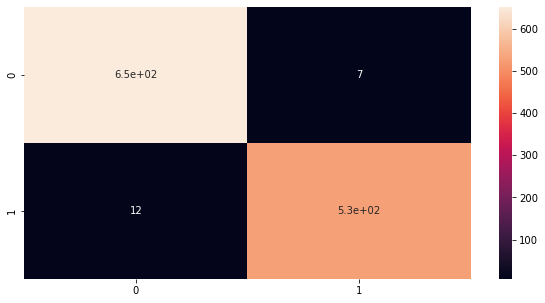

In [142]:
cm=confusion_matrix(y_predict_logistic,y_test)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)

In [143]:
print(classification_report(y_predict_logistic,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       658
           1       0.99      0.98      0.98       539

    accuracy                           0.98      1197
   macro avg       0.98      0.98      0.98      1197
weighted avg       0.98      0.98      0.98      1197



In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
def classify(model,X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    model.fit(X_train,y_train)
    print("Accuracy is :",accuracy_score(y_predict_logistic,y_test)*100)
    print("Cross Validation is : ", np.mean(cross_val_score(model,X,y,cv=5))*100)

In [158]:
classify(model,X,y)

Accuracy is : 98.4126984126984
Cross Validation is :  98.49548589164255


In [159]:
from sklearn.metrics import mean_squared_error

In [162]:
MSE=mean_squared_error(y_predict_logistic,y_test)
RMSE=np.sqrt(MSE)
RMSE

0.12598815766974242

In [164]:
from sklearn.metrics import r2_score

In [165]:
r2_score(y_predict_logistic,y_test)

0.9358741562388979

###### R^2 Value : 0.935
###### Root mean square error = 0.126 (very less)
###### Accuracy = 98.4 %
###### cross-validation = 98.5 %


### Model is trained and Tested , Logistic Regression suits the model.